In [1]:
%autosave 0

Autosave disabled


# Predict the flight ticket price challenge

We are provided with prices of flight tickets for various airlines between months of March and June of 2019 and between various cities

## Features:
1. Airline: Name of the airline
2. Date_of_Journey: The date of journey
3. Source: The source from which the service begins
4. Destination: The destination where the service ends
5. Route: The route taken by the flight to reach the destination
6. Dep_Time: The time when the journey starts from the source
7. Arrival_Time: Time of arrival at the destination
8. Duration: Total duration of the flight
9. Total_Stops: Total stops between the source and destination
10. Additional_Info: Additional information about the flight
11. Price: The price of the ticket

## Datasets directory
` ~\Datasets`

In [2]:
dataset_dir = r'\datasets\\'

## Load required libraries

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Add more libraries here to have them in one place

# Create inline plots in our notebook intead of creating popup of the plot. 
%matplotlib inline 

In [4]:
cwd = os.getcwd()
dataset_dir = cwd + r'\datasets\\'
dataset_dir

'C:\\BheemEnterprises\\ml_projects\\Hackathon\\Python\\MachineHack\\PredictTheFlightTicketPrice\\datasets\\\\'

## Load train and test datasets

In [5]:
train_data = pd.read_excel(dataset_dir + 'train.xlsx')
test_data = pd.read_excel(dataset_dir + 'test.xlsx')

print(train_data.shape)
print(test_data.shape)

(10683, 11)
(2671, 10)


## Visualise train dataset

In [6]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [8]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [10]:
train_data.values

array([['IndiGo', '24/03/2019', 'Banglore', ..., 'non-stop', 'No info',
        3897],
       ['Air India', '1/05/2019', 'Kolkata', ..., '2 stops', 'No info',
        7662],
       ['Jet Airways', '9/06/2019', 'Delhi', ..., '2 stops', 'No info',
        13882],
       ...,
       ['Jet Airways', '27/04/2019', 'Banglore', ..., 'non-stop',
        'No info', 7229],
       ['Vistara', '01/03/2019', 'Banglore', ..., 'non-stop', 'No info',
        12648],
       ['Air India', '9/05/2019', 'Delhi', ..., '2 stops', 'No info',
        11753]], dtype=object)

In [11]:
# Check null columns
null_columns = train_data.columns[train_data.isnull().any()]
train_data[null_columns].isnull().sum()

Route          1
Total_Stops    1
dtype: int64

In [12]:
# check row where Route is null and Total_Stops is null
train_data[train_data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [13]:
# Checking the route on internet, we found that AirIndia flight AI-429/509 has 1 stop at Chennai(MAA) of 19h 25m
# Impute missing values here
train_data.loc[9039, 'Route'] = 'DEL → MAA → COK'
train_data.loc[9039, 'Total_Stops'] = '1 stop'

In [14]:
# Check null columns
null_columns = train_data.columns[train_data.isnull().any()]
train_data[null_columns].isnull().sum() #None

Series([], dtype: float64)

In [15]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [16]:
train_data['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [17]:
train_data['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [18]:
# Convert Date_of_Journey column to proper datetime column
train_data['Date_of_Journey'] = pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y')
train_data['Date_of_Journey'].head()

0   2019-03-24
1   2019-05-01
2   2019-06-09
3   2019-05-12
4   2019-03-01
Name: Date_of_Journey, dtype: datetime64[ns]

In [19]:
# Create new column with Day_Name from date to see if Prices are on higher side on weekends
train_data['Day_name'] = train_data.Date_of_Journey.apply(lambda date: date.day_name())
train_data['Day_name'].head(10)

0       Sunday
1    Wednesday
2       Sunday
3       Sunday
4       Friday
5       Monday
6      Tuesday
7       Friday
8      Tuesday
9       Monday
Name: Day_name, dtype: object

In [20]:
# create new column with Day of week from date : # Monday = 0
train_data['Day_of_week'] = train_data.Date_of_Journey.apply(lambda date: date.dayofweek)
train_data['Day_of_week'].head(10)

0    6
1    2
2    6
3    6
4    4
5    0
6    1
7    4
8    1
9    0
Name: Day_of_week, dtype: int64

In [21]:
# Create new column with Month from date
train_data['Month'] = train_data.Date_of_Journey.apply(lambda date: date.month)
train_data['Month'].head()

0    3
1    5
2    6
3    5
4    3
Name: Month, dtype: int64

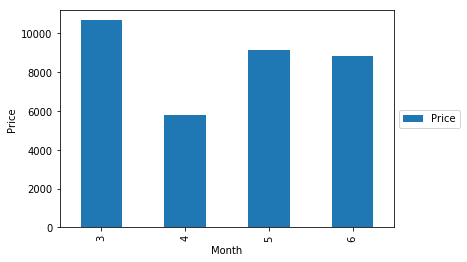

In [22]:
# Plot avg prices for each month
prices_by_month = train_data[['Month','Price']].groupby('Month').mean().plot(kind='bar')
prices_by_month.set_xlabel("Month")
prices_by_month.set_ylabel("Price")
prices_by_month.legend(loc='center left', bbox_to_anchor=(1,0.5))

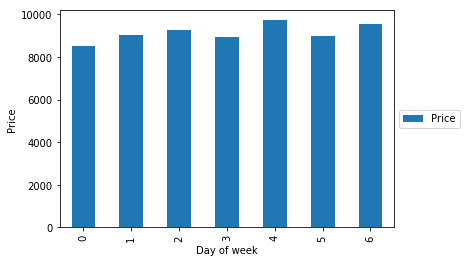

In [23]:
# Plot avg Prices for each day name
prices_by_day = train_data[['Day_of_week','Price']].groupby('Day_of_week').mean().plot(kind='bar')
prices_by_day.set_xlabel("Day of week")
prices_by_day.set_ylabel("Price")
prices_by_day.legend(loc='center left', bbox_to_anchor=(1,0.5))

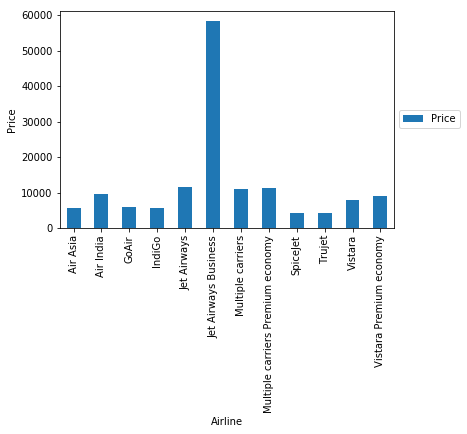

In [24]:
# Plot avg prices for each airline
prices_by_airline = train_data[['Airline','Price']].groupby('Airline').mean().plot(kind='bar')
prices_by_airline.set_xlabel('Airline')
prices_by_airline.set_ylabel('Price')
prices_by_airline.legend(loc='center left', bbox_to_anchor=(1,0.5))


In [25]:
outlier_airlines = ['Jet Airways Business']
train_data_filter = train_data.loc[train_data['Airline'].isin(outlier_airlines)==False,]
train_data_filter['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

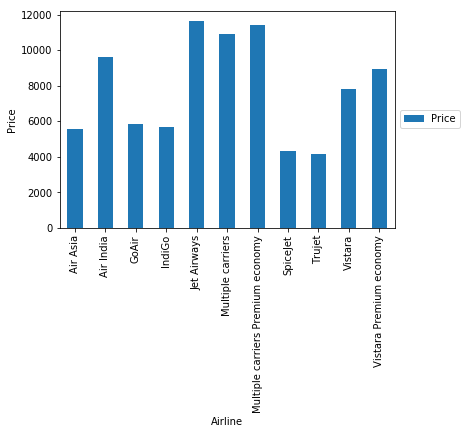

In [26]:
# Plot avg prices for each airline except 'Jet Airways Business'
prices_by_airline = train_data_filter[['Airline','Price']].groupby('Airline').mean().plot(kind='bar')
prices_by_airline.set_xlabel('Airline')
prices_by_airline.set_ylabel('Price')
prices_by_airline.legend(loc='center left', bbox_to_anchor=(1,0.5))

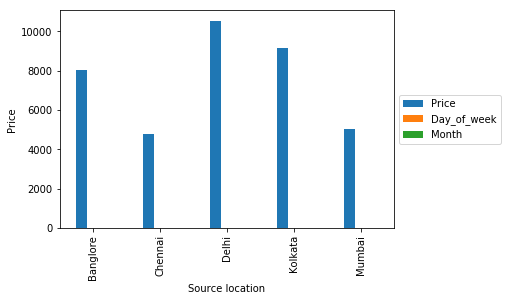

In [27]:
# Plot avg prices for each source
prices_by_source = train_data.groupby('Source').mean().plot(kind='bar')
prices_by_source.set_xlabel('Source location')
prices_by_source.set_ylabel('Price')
prices_by_source.legend(loc='center left', bbox_to_anchor=(1,0.5))

In [28]:
# check prices by routes
train_data['Route'].value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
CCU → DEL → BLR                       565
BLR → BOM → DEL                       402
MAA → CCU                             381
DEL → HYD → COK                       326
DEL → JAI → BOM → COK                 240
DEL → BLR → COK                       232
DEL → COK                             213
DEL → AMD → BOM → COK                 205
DEL → MAA → COK                       147
DEL → IDR → BOM → COK                  99
DEL → HYD → MAA → COK                  83
DEL → NAG → BOM → COK                  71
CCU → MAA → BLR                        65
DEL → GOI → BOM → COK                  58
DEL → HYD → BOM → COK                  56
CCU → HYD → BLR                        53
CCU → BBI → BLR                        50
DEL → BHO → BOM → COK                  50
CCU → IXR → DEL → BLR             

In [29]:
 train_data[['Source','Destination','Route']].head()

,Source,Destination,Route
0,Banglore,New Delhi,BLR → DEL
1,Kolkata,Banglore,CCU → IXR → BBI → BLR
2,Delhi,Cochin,DEL → LKO → BOM → COK
3,Kolkata,Banglore,CCU → NAG → BLR
4,Banglore,New Delhi,BLR → NAG → DEL


In [30]:
# Define codes for cities
city_codes = {'Banglore':'BLR','New Delhi':'DEL','Kolkata':'CCU','Cochin':'COK','Mumbai':'BOM','Delhi':'DEL','Hyderabad':'HYD','Chennai':'MAA'}
city_codes

{'Banglore': 'BLR',
 'New Delhi': 'DEL',
 'Kolkata': 'CCU',
 'Cochin': 'COK',
 'Mumbai': 'BOM',
 'Delhi': 'DEL',
 'Hyderabad': 'HYD',
 'Chennai': 'MAA'}

In [31]:
train_data['Source_Code'] = train_data['Source'].apply(lambda x: city_codes[x])
train_data['Source_Code'].head()

0    BLR
1    CCU
2    DEL
3    CCU
4    BLR
Name: Source_Code, dtype: object

In [32]:
train_data['Destination_Code'] = train_data['Destination'].apply(lambda x: city_codes[x])
train_data['Destination_Code'].head()

0    DEL
1    BLR
2    COK
3    BLR
4    DEL
Name: Destination_Code, dtype: object

In [33]:
train_data['Destination_Code'].value_counts()

COK    4537
BLR    2871
DEL    2197
HYD     697
CCU     381
Name: Destination_Code, dtype: int64

In [34]:
train_data['Source_Code'].value_counts()


DEL    4537
CCU    2871
BLR    2197
BOM     697
MAA     381
Name: Source_Code, dtype: int64

In [35]:
city_code_numeric = {'BLR':0,'BOM':1,'CCU':2,'COK':3,'DEL':4,'HYD':5,'MAA':6}
train_data['Source_Code_num'] = train_data['Source_Code'].apply(lambda x: city_code_numeric[x])
train_data['Destination_Code_num'] = train_data['Destination_Code'].apply(lambda x: city_code_numeric[x])

In [36]:
print(train_data['Source_Code_num'].value_counts())
print(train_data['Destination_Code_num'].value_counts())

4    4537
2    2871
0    2197
1     697
6     381
Name: Source_Code_num, dtype: int64
3    4537
0    2871
4    2197
5     697
2     381
Name: Destination_Code_num, dtype: int64


In [37]:
train_data['Total_Stops'] = train_data['Total_Stops'].str.replace(' stops','')
train_data['Total_Stops'] = train_data['Total_Stops'].str.replace(' stop','')
train_data['Total_Stops'] = train_data['Total_Stops'].replace('non-stop',0)
train_data['Total_Stops'].value_counts()

1    5626
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [38]:
train_data.groupby(['Source_Code','Destination_Code','Total_Stops']).count()

Airline  Date_of_Journey  Source  \
Source_Code Destination_Code Total_Stops                                     
BLR         DEL              0               1552             1552    1552   
                             1                562              562     562   
                             2                 75               75      75   
                             3                  7                7       7   
                             4                  1                1       1   
BOM         HYD              0                621              621     621   
                             1                 44               44      44   
                             2                 30               30      30   
                             3                  2                2       2   
CCU         BLR              0                724              724     724   
                             1               1834             1834    1834   
                             2                302              302     302   
                             3                 11               11      11   
DEL         COK              0                213              213     213   
                             1               3186             3186    3186   
                             2               1113             1113    1113   
                             3                 25               25      25   
MAA         CCU              0                381              381     381   

                                          Destination  Route  Dep_Time  \
Source_Code Destination_Code Total_Stops                                 
BLR         DEL              0                   1552   1552      1552   
                             1                    562    562       562   
                             2                     75     75        75   
                             3                      7      7         7   
                             4                      1      1         1   
BOM         HYD              0                    621    621       621   
                             1                     44     44        44   
                             2                     30     30        30   
                             3                      2      2         2   
CCU         BLR              0                    724    724       724   
                             1                   1834   1834      1834   
                             2                    302    302       302   
                             3                     11     11        11   
DEL         COK              0                    213    213       213   
                             1                   3186   3186      3186   
                             2                   1113   1113      1113   
                             3                     25     25        25   
MAA         CCU              0                    381    381       381   

                                          Arrival_Time  Duration  \
Source_Code Destination_Code Total_Stops                           
BLR         DEL              0                    1552      1552   
                             1                     562       562   
                             2                      75        75   
                             3                       7         7   
                             4                       1         1   
BOM         HYD              0                     621       621   
                             1                      44        44   
                             2                      30        30   
                             3                       2         2   
CCU         BLR              0                     724       724   
                             1                    1834      1834   
                             2                     302       302   
                             3                  

In [39]:
train_data['Total_Stops'] = pd.to_numeric(train_data['Total_Stops'])

In [40]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
3h         261
2h 20m     238
2h 30m     220
2h 40m     158
2h 15m     135
1h 25m     135
2h 25m      98
13h 30m     97
13h 20m     89
3h 15m      88
7h 30m      86
9h 30m      85
8h 40m      81
7h 15m      79
3h 5m       78
5h 30m      72
7h 35m      71
8h          68
7h 5m       65
9h 50m      64
9h          64
5h          63
11h 45m     62
11h         62
5h 15m      62
          ... 
27h 30m      1
3h 25m       1
29h 10m      1
41h 20m      1
32h 55m      1
27h 55m      1
31h 50m      1
47h 40m      1
47h          1
36h 25m      1
40h 20m      1
5m           1
19h 50m      1
35h 35m      1
37h 10m      1
30h 25m      1
42h 5m       1
28h 30m      1
32h 20m      1
29h 40m      1
42h 45m      1
33h 45m      1
30h 10m      1
33h 20m      1
35h 20m      1
13h 35m      1
29h 30m      1
4h 10m       1
31h 30m      1
30h 15m      1
Name: Duration, Length: 368, dtype: int64

In [41]:
# Convert '2h 50m' to 170 minutes
def convert_hours_or_minutes_into_minutes(duration):
    if(len(duration) == 0):
        return(0)
    # Example: '2h' or '30m' or '1h' or '45m' etc.
    last_char = duration[-1]
    total_mins = 0
    if (last_char == 'h'):
        hours = duration[:-1]
        total_mins += int(hours)*60
    elif (last_char == 'm'):
        minutes = duration[:-1]
        total_mins += int(minutes)
    return total_mins
        
def convert_duration_into_minutes(duration):
    splits = duration.strip().split(' ')
    
    total_mins = 0
    
    for part in splits:
        total_mins += convert_hours_or_minutes_into_minutes(part)
    
    #first = splits[0]
    #second = splits[1]
    
    #total_mins += convert_hours_or_minutes_into_minutes(first)
    #total_mins += convert_hours_or_minutes_into_minutes(second)
    return total_mins


In [42]:
print(convert_duration_into_minutes('2h 30m'))
print(convert_duration_into_minutes('30m'))
print(convert_duration_into_minutes('30m '))
print(convert_duration_into_minutes('2h'))
print(convert_duration_into_minutes('2h '))

150
30
30
120
120


In [43]:
train_data['Duration_In_Mins'] = train_data['Duration'].apply(lambda x: convert_duration_into_minutes(x))
train_data['Duration_In_Mins'].head()

0     170
1     445
2    1140
3     325
4     285
Name: Duration_In_Mins, dtype: int64

In [44]:
train_data['Additional_Info'].value_counts() # Lets park this feature for now. Will include if needed

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [45]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 19 columns):
Airline                 10683 non-null object
Date_of_Journey         10683 non-null datetime64[ns]
Source                  10683 non-null object
Destination             10683 non-null object
Route                   10683 non-null object
Dep_Time                10683 non-null object
Arrival_Time            10683 non-null object
Duration                10683 non-null object
Total_Stops             10683 non-null int64
Additional_Info         10683 non-null object
Price                   10683 non-null int64
Day_name                10683 non-null object
Day_of_week             10683 non-null int64
Month                   10683 non-null int64
Source_Code             10683 non-null object
Destination_Code        10683 non-null object
Source_Code_num         10683 non-null int64
Destination_Code_num    10683 non-null int64
Duration_In_Mins        10683 non-null int64
dtypes: datetime

In [46]:
train_data.describe()

,Total_Stops,Price,Day_of_week,Month,Source_Code_num,Destination_Code_num,Duration_In_Mins
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,0.824207,9087.064121,2.934850,4.708602,2.515492,2.494243,643.093232
std,0.675199,4611.359167,2.006698,1.164357,1.700529,1.632622,507.862001
min,0.000000,1759.000000,0.000000,3.000000,0.000000,0.000000,5.000000
25%,0.000000,5277.000000,1.000000,3.000000,1.000000,0.000000,170.000000
50%,1.000000,8372.000000,3.000000,5.000000,2.000000,3.000000,520.000000
75%,1.000000,12373.000000,5.000000,6.000000,4.000000,4.000000,930.000000
max,4.000000,79512.000000,6.000000,6.000000,6.000000,5.000000,2860.000000


In [47]:
train_data_final = train_data[['Airline','Month','Day_of_week','Source_Code_num','Destination_Code_num','Duration_In_Mins','Total_Stops','Price']]
train_data_final.head()

,Airline,Month,Day_of_week,Source_Code_num,Destination_Code_num,Duration_In_Mins,Total_Stops,Price
0,IndiGo,3,6,0,4,170,0,3897
1,Air India,5,2,2,0,445,2,7662
2,Jet Airways,6,6,4,3,1140,2,13882
3,IndiGo,5,6,2,0,325,1,6218
4,IndiGo,3,4,0,4,285,1,13302


## Visualise test data set

In [48]:
null_columns = test_data.columns[test_data.isnull().any()]
test_data[null_columns].isnull().sum() #None

Series([], dtype: float64)

In [49]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [50]:
# Convert Date_of_Journey column to proper datetime column
test_data['Date_of_Journey'] = pd.to_datetime(test_data['Date_of_Journey'], format='%d/%m/%Y')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,2019-05-12,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [51]:
# Create new column with Day_Name from date
test_data['Day_name'] = test_data.Date_of_Journey.apply(lambda date: date.day_name())
test_data['Day_name'].head()

0    Thursday
1      Sunday
2     Tuesday
3     Tuesday
4      Monday
Name: Day_name, dtype: object

In [52]:
# Create new column with Day_of_week from date : # Monday = 0
test_data['Day_of_week'] = test_data.Date_of_Journey.apply(lambda date: date.dayofweek)
test_data['Day_of_week'].head()

0    3
1    6
2    1
3    1
4    0
Name: Day_of_week, dtype: int64

In [53]:
# Create new column with Month from date
test_data['Month'] = test_data.Date_of_Journey.apply(lambda date: date.month)
test_data['Month'].head()

0    6
1    5
2    5
3    5
4    6
Name: Month, dtype: int64

In [54]:
test_data['Source_Code'] = test_data['Source'].apply(lambda x: city_codes[x])
test_data['Source_Code'].head()

0    DEL
1    CCU
2    DEL
3    DEL
4    BLR
Name: Source_Code, dtype: object

In [55]:
test_data['Destination_Code'] = test_data['Destination'].apply(lambda x: city_codes[x])
test_data['Destination_Code'].head()

0    COK
1    BLR
2    COK
3    COK
4    DEL
Name: Destination_Code, dtype: object

In [56]:
test_data['Source_Code_num'] = test_data['Source_Code'].apply(lambda x: city_code_numeric[x])
test_data['Destination_Code_num'] = test_data['Destination_Code'].apply(lambda x: city_code_numeric[x])

print(test_data['Source_Code_num'].value_counts())
print(test_data['Destination_Code_num'].value_counts())

4    1145
2     710
0     555
1     186
6      75
Name: Source_Code_num, dtype: int64
3    1145
0     710
4     555
5     186
2      75
Name: Destination_Code_num, dtype: int64


In [57]:
test_data['Total_Stops'] = test_data['Total_Stops'].str.replace(' stops','')
test_data['Total_Stops'] = test_data['Total_Stops'].str.replace(' stop','')
test_data['Total_Stops'] = test_data['Total_Stops'].replace('non-stop',0)
test_data['Total_Stops'].value_counts()

1    1431
0     849
2     379
3      11
4       1
Name: Total_Stops, dtype: int64

In [58]:
test_data['Total_Stops'] = pd.to_numeric(test_data['Total_Stops'])
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 17 columns):
Airline                 2671 non-null object
Date_of_Journey         2671 non-null datetime64[ns]
Source                  2671 non-null object
Destination             2671 non-null object
Route                   2671 non-null object
Dep_Time                2671 non-null object
Arrival_Time            2671 non-null object
Duration                2671 non-null object
Total_Stops             2671 non-null int64
Additional_Info         2671 non-null object
Day_name                2671 non-null object
Day_of_week             2671 non-null int64
Month                   2671 non-null int64
Source_Code             2671 non-null object
Destination_Code        2671 non-null object
Source_Code_num         2671 non-null int64
Destination_Code_num    2671 non-null int64
dtypes: datetime64[ns](1), int64(5), object(11)
memory usage: 354.8+ KB


In [59]:
test_data['Duration_In_Mins'] = test_data['Duration'].apply(lambda x: convert_duration_into_minutes(x))
test_data['Duration_In_Mins'].head()

0     655
1     240
2    1425
3     780
4     170
Name: Duration_In_Mins, dtype: int64

In [60]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 18 columns):
Airline                 2671 non-null object
Date_of_Journey         2671 non-null datetime64[ns]
Source                  2671 non-null object
Destination             2671 non-null object
Route                   2671 non-null object
Dep_Time                2671 non-null object
Arrival_Time            2671 non-null object
Duration                2671 non-null object
Total_Stops             2671 non-null int64
Additional_Info         2671 non-null object
Day_name                2671 non-null object
Day_of_week             2671 non-null int64
Month                   2671 non-null int64
Source_Code             2671 non-null object
Destination_Code        2671 non-null object
Source_Code_num         2671 non-null int64
Destination_Code_num    2671 non-null int64
Duration_In_Mins        2671 non-null int64
dtypes: datetime64[ns](1), int64(6), object(11)
memory usage: 375.7+ KB


In [61]:
test_data.describe()

,Total_Stops,Day_of_week,Month,Source_Code_num,Destination_Code_num,Duration_In_Mins
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.00000
mean,0.833396,2.949083,4.718458,2.484463,2.521528,639.74167
std,0.672315,2.008510,1.170851,1.682595,1.636717,502.18693
min,0.000000,0.000000,3.000000,0.000000,0.000000,5.00000
25%,0.000000,2.000000,3.000000,1.000000,0.000000,175.00000
50%,1.000000,3.000000,5.000000,2.000000,3.000000,520.00000
75%,1.000000,5.000000,6.000000,4.000000,4.000000,915.00000
max,4.000000,6.000000,6.000000,6.000000,5.000000,2440.00000


In [62]:
test_data_final = test_data[['Airline','Month','Day_of_week','Source_Code_num','Destination_Code_num','Duration_In_Mins','Total_Stops']]
test_data_final.head()

,Airline,Month,Day_of_week,Source_Code_num,Destination_Code_num,Duration_In_Mins,Total_Stops
0,Jet Airways,6,3,4,3,655,1
1,IndiGo,5,6,2,0,240,1
2,Jet Airways,5,1,4,3,1425,1
3,Multiple carriers,5,1,4,3,780,1
4,Air Asia,6,0,0,4,170,0
